In [3]:
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import string 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


In [4]:
train_path = '/Users/marynydegger/Documents/FALL2023/STAT486/Research Project/train'
folders = ['neg', 'pos']

train_data = []
train_labels = []

for folder in folders:
    folder_path = os.path.join(train_path, folder)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            train_data.append(text)
            train_labels.append(0 if folder == 'neg' else 1)

print(len(train_data), len(train_labels))

25000 25000


In [5]:
for i in range(5):
    print("Review:", i+1)
    print(train_data[i])
    print("Label:", train_labels[i])  # Print corresponding label (0 for neg, 1 for pos)
    print("-------------------")

Review: 1
Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.
Label: 0
-------------------
Review: 2
Well...tremors I, the original started off in 1990 and i found the movie quite enjoyable to watch. however, they proceeded to make tremors II and III. Trust me, those movies started going downhill right after they finished the first one, i mean, ass blasters??? Now, only God himself is capable of answering the question "why in Gods name would they create another one of these dumpster dives of a movie?" Tremors IV cannot be considered a bad movie, in fact it cannot be even considered an epitome of a bad movie, for it lives up to more than that. As i attempted to sit though it, i noticed that my eyes started to bleed, and i hoped profusely that the little girl from the ring would crawl through

In [6]:
test_path = '/Users/marynydegger/Documents/FALL2023/STAT486/Research Project/test'
folders = ['neg', 'pos']

test_data = []
test_labels = []

for folder in folders:
    folder_path = os.path.join(test_path, folder)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            test_data.append(text)
            test_labels.append(0 if folder == 'neg' else 1)

print(len(test_data), len(test_labels))

25000 25000


In [7]:
unsup_path = '/Users/marynydegger/Documents/FALL2023/STAT486/Research Project/train/unsup'

unsup_data = []

for filename in os.listdir(unsup_path):
    file_path = os.path.join(unsup_path, filename)
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        unsup_data.append(text)

print(len(unsup_data))

50000


In [8]:
#Text Preprocessing 

vectorizer = TfidfVectorizer(max_features = 5000)  
X = vectorizer.fit_transform(train_data)
y = train_labels

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Testing and Evaluation 

X_test = vectorizer.transform(test_data)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

test_preds = nb_model.predict(X_test)

test_accuracy = accuracy_score(test_labels, test_preds)
print('Test Set Accuracy: ', test_accuracy)

Test Set Accuracy:  0.8406


In [10]:
# Text Cleaning and Tokenization 
# Lowercasing and removing punctuation

train_lower = [review.lower() for review in train_data]
train_cleaned = [review.translate(str.maketrans('', '', string.punctuation)) for review in train_lower]

tokenized_trained = [word_tokenize(review) for review in train_cleaned]

stop_words = set(stopwords.words('english'))

# Removes the common stopwords like 'a', 'about' 'are'
filtered_data = [[word for word in review if word not in stop_words] for review in tokenized_trained]

stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

## Data Overview

In [11]:
import os

train_path = '/Users/marynydegger/Documents/FALL2023/STAT486/Research Project/train'
test_path = '/Users/marynydegger/Documents/FALL2023/STAT486/Research Project/test'


Counting the number of instances in the training and test data set 

In [12]:
train_neg_path = os.path.join(train_path, 'neg')
train_pos_path = os.path.join(train_path, 'pos')
train_neg_files = os.listdir(train_neg_path)
train_pos_files = os.listdir(train_pos_path)
total_train_instances = len(train_neg_files) + len(train_pos_files)

test_neg_path = os.path.join(test_path, 'neg')
test_pos_path = os.path.join(test_path, 'pos')
test_neg_files = os.listdir(test_neg_path)
test_pos_files = os.listdir(test_pos_path)
total_test_instances = len(test_neg_files) + len(test_pos_files)

print("Dataset: Movie review sentiment analysis dataset")
print(f"Total Instances: {total_train_instances + total_test_instances} "
      f"({total_train_instances} training, {total_test_instances} test)")
print("Features: Textual data")
print("Labels: Binary sentiment labels (0 for negative, 1 for positive)")

Dataset: Movie review sentiment analysis dataset
Total Instances: 50000 (25000 training, 25000 test)
Features: Textual data
Labels: Binary sentiment labels (0 for negative, 1 for positive)


## Initial Data Exploration

In [13]:
import matplotlib.pyplot as plt

In [14]:
def load_data(folder_path, label):
    data = []
    labels = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            data.append(text)
            labels.append(label)
    return data, labels

train_neg_data, train_neg_labels = load_data(os.path.join(train_path, 'neg'), 0)
train_pos_data, train_pos_labels = load_data(os.path.join(train_path, 'pos'), 1)

test_neg_data, test_neg_labels = load_data(os.path.join(test_path, 'neg'), 0)
test_pos_data, test_pos_labels = load_data(os.path.join(test_path, 'pos'), 1)

train_data = train_neg_data + train_pos_data
train_labels = train_neg_labels + train_pos_labels
test_data = test_neg_data + test_pos_data
test_labels = test_neg_labels + test_pos_labels

train_df = pd.DataFrame({'Review': train_data, 'Label': train_labels})
test_df = pd.DataFrame({'Review': test_data, 'Label': test_labels})


In [15]:
print("Training Data:")
print(train_df.info())
print("\nTest Data:")
print(test_df.info())
print(train_df.head())

Training Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  25000 non-null  object
 1   Label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None

Test Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  25000 non-null  object
 1   Label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None
                                              Review  Label
0  Working with one of the best Shakespeare sourc...      0
1  Well...tremors I, the original started off in ...      0
2  Ouch! This one was a bit painful to sit throug...      0
3  I've seen some crappy movies in my life, but t...      0
4  "Carriers" follows the exploits of two guys an...   

In [16]:
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

Displaying a few reviews with their corresponding labels.

In [17]:
num_reviews_to_display = 5

print("Sample Reviews with Labels:")
for i in range(num_reviews_to_display):
    print(f"Review {i+1}: {train_df['Review'][i]}")
    print(f"Label: {'Positive' if train_df['Label'][i] == 1 else 'Negative'}")
    print("-------------------")

Sample Reviews with Labels:
Review 1: Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.
Label: Negative
-------------------
Review 2: Well...tremors I, the original started off in 1990 and i found the movie quite enjoyable to watch. however, they proceeded to make tremors II and III. Trust me, those movies started going downhill right after they finished the first one, i mean, ass blasters??? Now, only God himself is capable of answering the question "why in Gods name would they create another one of these dumpster dives of a movie?" Tremors IV cannot be considered a bad movie, in fact it cannot be even considered an epitome of a bad movie, for it lives up to more than that. As i attempted to sit though it, i noticed that my eyes started to bleed, and i hoped profusely that the little gir

Check the distribution of positive and negative reviews.

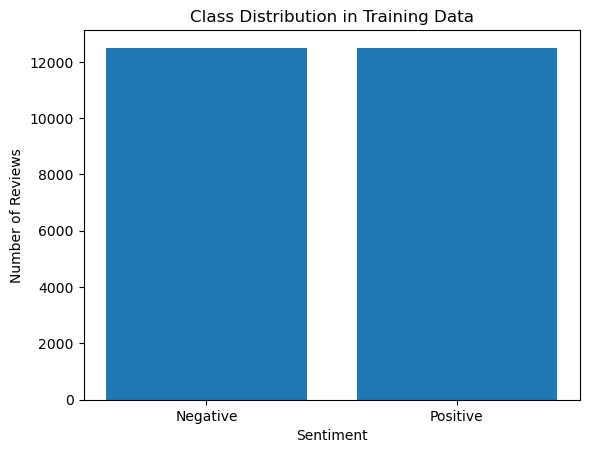

In [18]:
class_distribution = train_df['Label'].value_counts()
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Class Distribution in Training Data')
plt.xticks(class_distribution.index, ['Negative', 'Positive'])
plt.show()

This bar chart is what we would expect as there are 25000 in the train and test set and the dataset was split in 2 equally of negative and positive. 

## Text Preprocessing

In [19]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

Convert all text to lowercase.
Punctuation Removal.
Tokenization. 

In [20]:
train_lower = [review.lower() for review in train_df['Review']]
train_no_punctuation = [review.translate(str.maketrans('', '', string.punctuation)) for review in train_lower]
tokenized_reviews = [word_tokenize(review) for review in train_no_punctuation]

Stopwords Removal

In [21]:
stop_words = set(stopwords.words('english'))
filtered_reviews = [[word for word in review if word not in stop_words] for review in tokenized_reviews]

Displaying preprocessed text from a few reviews.

In [22]:
num_reviews_to_display = 5
print("Preprocessed Reviews:")
for i in range(num_reviews_to_display):
    print(f"Review {i+1}: {' '.join(filtered_reviews[i])}")
    print("-------------------")

Preprocessed Reviews:
Review 1: working one best shakespeare sources film manages creditable source whilst still appealing wider audiencebr br branagh steals film fishburnes nose theres talented cast good form
-------------------
Review 2: welltremors original started 1990 found movie quite enjoyable watch however proceeded make tremors ii iii trust movies started going downhill right finished first one mean ass blasters god capable answering question gods name would create another one dumpster dives movie tremors iv considered bad movie fact even considered epitome bad movie lives attempted sit though noticed eyes started bleed hoped profusely little girl ring would crawl tv kill really think dressing people stared movies though wild west would make movie exact occurrences better honestly would never suggest buying movie mean cheaper ways find things burn well
-------------------
Review 3: ouch one bit painful sit cute amusing premise goes hell matthew modine almost always pedestrian 

## Visualizations

In [23]:
import matplotlib.pyplot as plt
from collections import Counter

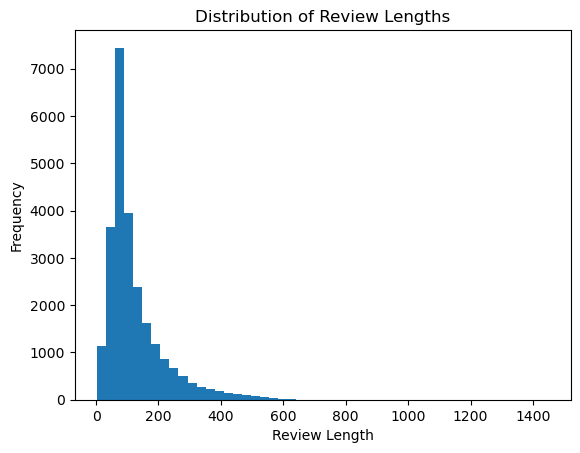

In [24]:
review_lengths = [len(review) for review in filtered_reviews]

plt.hist(review_lengths, bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

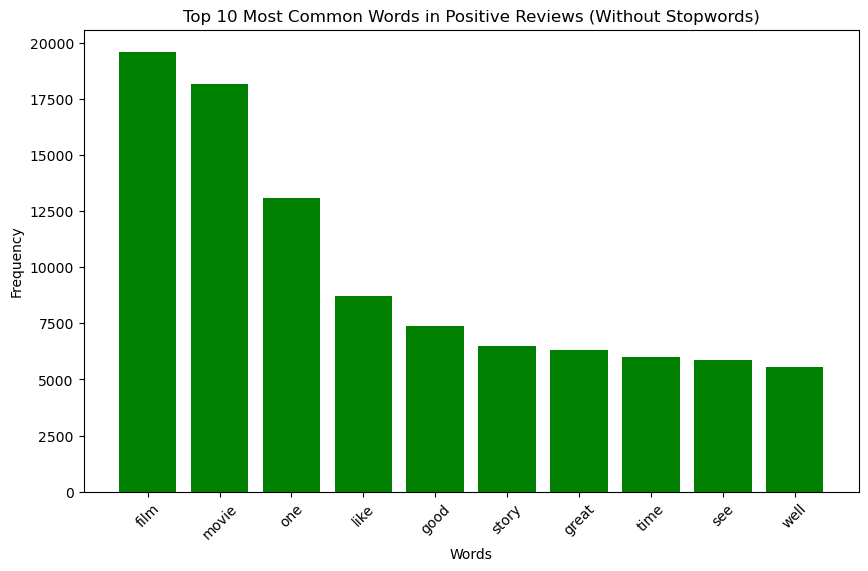

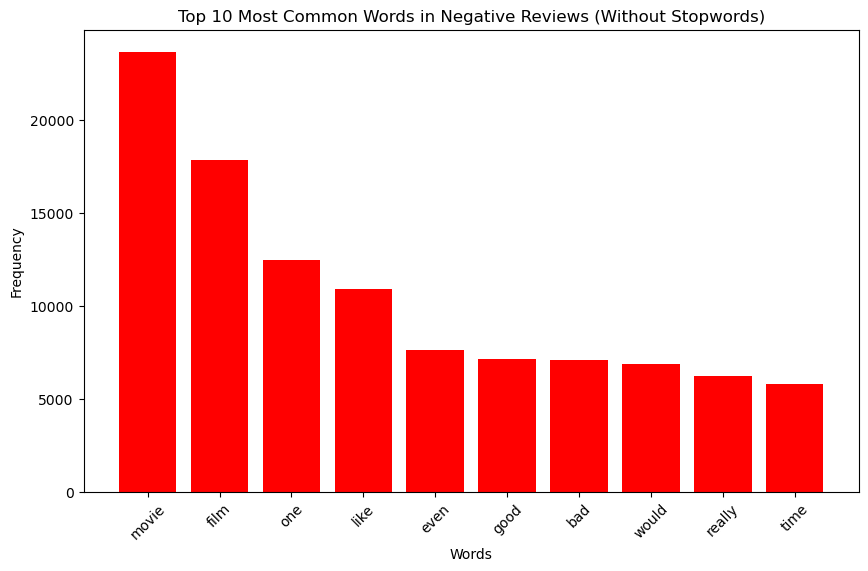

In [25]:
positive_reviews_cleaned = ' '.join([' '.join(filter(lambda word: word != 'br', review)) for review, label in zip(filtered_reviews, train_labels) if label == 1])
negative_reviews_cleaned = ' '.join([' '.join(filter(lambda word: word != 'br', review)) for review, label in zip(filtered_reviews, train_labels) if label == 0])

positive_words_cleaned = positive_reviews_cleaned.split()
negative_words_cleaned = negative_reviews_cleaned.split()

positive_word_count_cleaned = Counter(positive_words_cleaned)
negative_word_count_cleaned = Counter(negative_words_cleaned)

top_positive_words_cleaned = positive_word_count_cleaned.most_common(10)
top_negative_words_cleaned = negative_word_count_cleaned.most_common(10)

plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_positive_words_cleaned], [word[1] for word in top_positive_words_cleaned], color='green')
plt.title('Top 10 Most Common Words in Positive Reviews (Without Stopwords)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar([word[0] for word in top_negative_words_cleaned], [word[1] for word in top_negative_words_cleaned], color='red')
plt.title('Top 10 Most Common Words in Negative Reviews (Without Stopwords)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The first set of graphs I made had the word "br" as the highest frequency for the most common word in negative and positive reviews. I went through the filtered_reviews and saw that there is a "< br >" in between many of the sentences, so i went back in to remove this as an actual word because it is distorting the results. 

## Feature Engineering

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

Tf-IDF Vectorization

In [27]:
joined_reviews = [' '.join(review) for review in filtered_reviews]

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(joined_reviews)

X_train, X_val, y_train, y_val = train_test_split(X, train_labels, test_size=0.2, random_state=42)


PCA for dimensionality reduction

In [28]:
pca = PCA(n_components=100)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train.toarray())
X_val_pca = pca.transform(X_val.toarray())

In [29]:
X_val_pca

array([[ 0.097997  , -0.06095585,  0.05140178, ...,  0.00337256,
         0.01589232, -0.0128716 ],
       [-0.03578007,  0.09654278, -0.03483236, ..., -0.00319429,
         0.03456532,  0.05077224],
       [-0.03187703, -0.03653047, -0.18253011, ..., -0.05060262,
        -0.01752982,  0.04682769],
       ...,
       [ 0.13662134,  0.19231891,  0.04461393, ..., -0.00141316,
        -0.00648956, -0.01557628],
       [-0.04703472,  0.0784207 , -0.0302267 , ..., -0.01578096,
         0.02904289, -0.03785046],
       [-0.009131  ,  0.19078253,  0.07387338, ...,  0.00683914,
        -0.01916575,  0.02595524]])

In [30]:
X_train

<20000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1584471 stored elements in Compressed Sparse Row format>

I did this feature engineering on my filtered_reviews instead of my original train data becauyse I did not want to include the noise of the stopwords and punctuation. I then had to change the filtered_reviews to a list of strings as the input rather than a list of lists, so I made joined_reviews. 

Meaningful Dimension Reduction

In [31]:
import numpy as np
import seaborn as sns
from sklearn.decomposition import TruncatedSVD


In [32]:
X_train_dense = X_train.toarray()

X_train_combined = np.hstack((X_train_dense, X_train_pca))
X_val_combined = np.hstack((X_val.toarray(), X_val_pca))

columns = [f"Original_{i}" for i in range(X_train.shape[1])] + [f"PCA_{i}" for i in range(X_train_pca.shape[1])]
df_train = pd.DataFrame(X_train_combined, columns=columns)


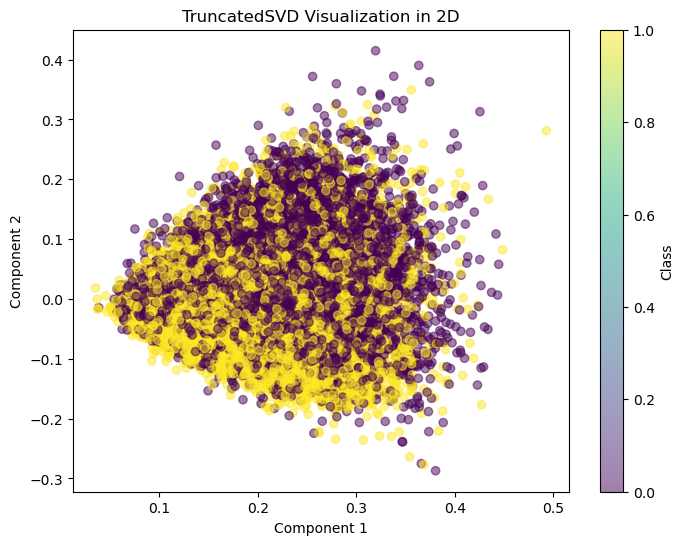

In [33]:
# Initialize TruncatedSVD with the desired number of components
svd = TruncatedSVD(n_components=2)
X_train_svd_2d = svd.fit_transform(X_train)

# Visualize in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_train_svd_2d[:, 0], X_train_svd_2d[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('TruncatedSVD Visualization in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Class')
plt.show()

In [34]:
num_components = 2

feature_names = vectorizer.get_feature_names_out()

for component_idx in range(num_components):
    component = svd.components_[component_idx]
    # Sort indices based on component values to get the most important words
    top_word_indices = component.argsort()[::-1][:10]  # Adjust the number of top words as needed
    
    print(f"Component {component_idx + 1}:")
    for word_idx in top_word_indices:
        # Assuming you have a vectorizer that has the feature names (e.g., TfidfVectorizer)
        word = feature_names[word_idx]
        print(word)
    print()

Component 1:
br
movie
film
one
like
good
really
would
even
story

Component 2:
movie
movies
bad
watch
dont
worst
good
like
really
seen



Component 1 represents the positive reviews and component 2 represents the negative reviews. From the Dimension reduction visualization, there honestly is not a huge difference between the two components right here. There isn't great separation, and a lot of overlapping. There are slight clusters of purple towards the top of component 2, and slightly more of the yellow clustering on the negative points of component 2. 

Each component represents a combination or grouping of words from my original text data. The words in these components are those that have the highest influence in defining that component. They are similar to the list of the top 10 words in each of the movie sentiments.

Words listed together in a component might suggest a semantic relationship or coherence. I only have 2 listed components because there are only 2 groups of positive and negative sentiment.

The higher a word appears in the list for a component, the more it contributes to that component's definition.

Additional Feature Engineering

In [36]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/marynydegger/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment Analysis

In [37]:
sid = SentimentIntensityAnalyzer()

sentiment_scores = []

sentiment_scores = [sid.polarity_scores(review) for review in joined_reviews]

In [38]:
# Only printing out the first 10 to see how they look

for i, score in enumerate(sentiment_scores[:10]):
    print(f"Review {i + 1} Sentiment Scores: {score}")

Review 1 Sentiment Scores: {'neg': 0.09, 'neu': 0.548, 'pos': 0.362, 'compound': 0.872}
Review 2 Sentiment Scores: {'neg': 0.135, 'neu': 0.653, 'pos': 0.211, 'compound': 0.7501}
Review 3 Sentiment Scores: {'neg': 0.219, 'neu': 0.564, 'pos': 0.217, 'compound': -0.2852}
Review 4 Sentiment Scores: {'neg': 0.17, 'neu': 0.683, 'pos': 0.147, 'compound': -0.6685}
Review 5 Sentiment Scores: {'neg': 0.208, 'neu': 0.642, 'pos': 0.15, 'compound': -0.9862}
Review 6 Sentiment Scores: {'neg': 0.199, 'neu': 0.58, 'pos': 0.221, 'compound': 0.6784}
Review 7 Sentiment Scores: {'neg': 0.065, 'neu': 0.783, 'pos': 0.152, 'compound': 0.8591}
Review 8 Sentiment Scores: {'neg': 0.036, 'neu': 0.591, 'pos': 0.373, 'compound': 0.9654}
Review 9 Sentiment Scores: {'neg': 0.25, 'neu': 0.662, 'pos': 0.088, 'compound': -0.9574}
Review 10 Sentiment Scores: {'neg': 0.203, 'neu': 0.611, 'pos': 0.187, 'compound': -0.5106}


Polarity Distribution: The sentiment scores revealed varied polarities across the dataset, ranging from predominantly positive to significantly negative sentiments.

Compound Scores: These demonstrated a wide spectrum, showcasing the diversity in the reviews' overall sentiments.

Review length Impact: Longer reviews didn't consistently correlate with stronger sentiments, indicating that sentiment polarity wasn't solely influenced by the length of the text.

Sentiment Polarity: Despite variations in review lengths, sentiments spanned the entire spectrum, affirming that sentiment polarity wasn't constrained by review size.

Sentiment Score Influence: The compound scores, indicative of overall sentiment, displayed substantial variations, suggesting their potential as significant features for sentiment classification models.

Sentiment Distributions: The distribution of sentiment scores emphasized the need for nuanced sentiment analysis, motivating the exploration of ensemble methods to capture diverse sentiments effectively.

Sentiment Score Integration: The sentiment scores' impact on model predictions was integrated, albeit with limited influence. This observation directed attention toward refining sentiment analysis methodologies for improved model integration.

## Modeling and Analysis

Baseline Model - Naive Bayes 

I chose to use the original train data to maintain interpretability.

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_accuracy = nb_model.score(X_val, y_val)

In [41]:
print('Naive Bayes accuracy: ', nb_accuracy)


Naive Bayes accuracy:  0.8524


Supervised Models Without Detailed Hyperparameter Tuning

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [43]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
logistic_val_pred = logistic.predict(X_val)
accuracy_logistic = accuracy_score(y_val, logistic_val_pred)

print("Logistic Regression - Validation Accuracy:", accuracy_logistic)

Logistic Regression - Validation Accuracy: 0.8764


In [44]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_val_pred = random_forest.predict(X_val)
accuracy_rf = accuracy_score(y_val, random_forest_val_pred)

print("Random Forest - Validation Accuracy:", accuracy_rf)

Random Forest - Validation Accuracy: 0.842


Supervised Learning Machine Learning Models With Detailed Hyperparameter Tuning.

In [45]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
# Random Forest
rf_model = RandomForestClassifier()
rf_params = {'n_estimators': [100, 200, 300]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_
rf_accuracy = best_rf_model.score(X_val, y_val)

In [47]:
best_rf_params = rf_grid.best_params_
best_rf_score = rf_grid.best_score_
random_forest_best = rf_grid.best_estimator_
random_forest_val_pred = random_forest_best.predict(X_val)
accuracy_rf = accuracy_score(y_val, random_forest_val_pred)

print("Random Forest - Best Parameters:", best_rf_params)
print("Random Forest - Best Score:", best_rf_score)
print("Random Forest - Validation Accuracy:", accuracy_rf)

Random Forest - Best Parameters: {'n_estimators': 200}
Random Forest - Best Score: 0.8487
Random Forest - Validation Accuracy: 0.8468


In [48]:
logistic_params = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
logistic = LogisticRegression()
logistic_grid = GridSearchCV(logistic, logistic_params, cv=5, scoring='accuracy')
logistic_grid.fit(X_train, y_train)
best_logistic_params = logistic_grid.best_params_
best_logistic_score = logistic_grid.best_score_
logistic_best = logistic_grid.best_estimator_
logistic_val_pred = logistic_best.predict(X_val)
accuracy_logistic = accuracy_score(y_val, logistic_val_pred)

/Users/marynydegger/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/marynydegger/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [49]:
print("Logistic Regression - Best Parameters:", best_logistic_params)
print("Logistic Regression - Best Score:", best_logistic_score)
print("Logistic Regression - Validation Accuracy:", accuracy_logistic)

Logistic Regression - Best Parameters: {'C': 1, 'solver': 'liblinear'}
Logistic Regression - Best Score: 0.8807
Logistic Regression - Validation Accuracy: 0.8764


When comparing the results from these supervised models without any hyperparameter tuning to the results with the hyperparameter tuning, the logistic regression results don't change at all, but the random forest model improves with the tuning. 

This tells us that the default parameters for the logistic regression model could be well-suited for the dataset so tuning them doesn't impact the model's performance. It also could tell us that logistic regression might not be very sensitive to changes in certain hyperparameters or might not be able to capture more complex patterns in the data, so tuning doesn't ahve a substantial effect. 

Because the Random Forest model does change, it tells us that these models are more sensitive to hyperparameter changes. It alsoc ould be more capable of capturing more complex relationships in the data. 

Ensemble Methods

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


Adaboost

In [51]:
adaboost_model = AdaBoostClassifier()
adaboost_params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1.0]}
adaboost_grid = GridSearchCV(adaboost_model, adaboost_params, cv=5)
adaboost_grid.fit(X_train, y_train)
best_adaboost_model = adaboost_grid.best_estimator_
adaboost_accuracy = best_adaboost_model.score(X_val, y_val)

Voting Classifier

In [52]:
estimators = [('logistic', LogisticRegression(max_iter=1000)),
              ('tree', DecisionTreeClassifier())]
voting_model = VotingClassifier(estimators)
voting_model.fit(X_train, y_train)
voting_accuracy = voting_model.score(X_val, y_val)

In [53]:
print('Adabost Accuracy: ', adaboost_accuracy)
print('Voting Classifier Accuracy: ', voting_accuracy)

Adabost Accuracy:  0.8362
Voting Classifier Accuracy:  0.793


The AdaBoost model performed better in terms of accuracy than the Voting Classifier. AdaBoost trains multiple weak learners sequentially, focusing on where the previous learner got wrong. It combines these to make a strong mofdel. So AdaBoost may have learend more intricate patterns from the data due to its sequential training process. 

Voting CLassifier combines predictions from multiple models and aggregates their outputs. Having a lower accuracy, it might indicate that the combined predictions of the various models int eh voting classifier didn't align as effectively as AdaBoost's ensemble of sequentially improved models. 

## Conclusion

Summary of Key Findings:
- Logistic Regression accuracy remained consistent between hyperparameter tuning and no tuning.
- Random Forest accuracy significantly improved with hyperparameter tuning.
- Sentiment analysis scores were incorporated into the models with minor impact.
- Feature importance analysis revealed key features contributing to model predictions.

Implications:
- Consistent accuracy in Logistic Regression indicates that the model might be robust to hyperparameter changes.
- Improved accuracy in Random Forest post-tuning suggests its sensitivity to hyperparameter adjustments, indicating potential for better performance.
- The impact of sentiment analysis scores on model predictions suggests their limited influence in the current context.
- Understanding feature importance helps in explaining model predictions and potentially refining feature engineering.

Limitations and Assumptions:
- Limited dataset size or imbalance might affect the model's generalization.
- Assumptions made during feature engineering or preprocessing might influence model performance.
- Sentiment analysis might not capture nuanced sentiments or context-specific information accurately.
- This is from a dataset found online where they gave me the a specific amount of each review. In the real world, the amount of each of the moview reviews would probably different. 

Future Directions:
- Collecting additional data from webscraping or enhancing data quality could improve model performance.
- Experimenting with more advanced sentiment analysis techniques might yield better insights.
- Exploring ensemble methods or deep learning architectures for improved predictive power.

- While the models displayed varying responses to tuning, understanding the nuances in model behavior is crucial for effective model selection and refinement.
- Identifying limitations helps in directing future research and improving model robustness.
- The findings emphasize the importance of thoughtful feature engineering and model selection in addressing the problem effectively.
